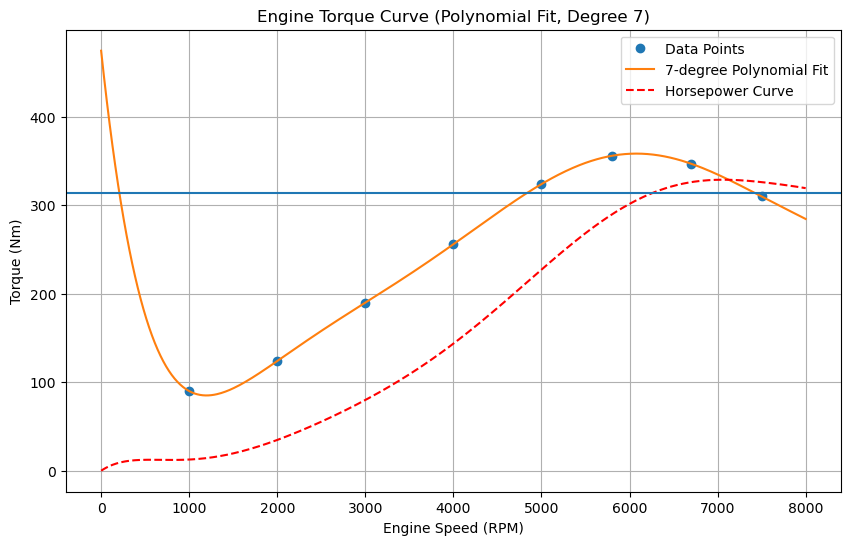

Coefficients of the fitted polynomial:
[-2.53492890e-23  8.78192158e-19 -1.22969330e-14  8.95405136e-11
 -3.65685937e-07  8.38478326e-04 -9.35642949e-01  4.74754136e+02]
"coefficient_0": 474.75413594574826,
"coefficient_1": -0.9356429491796222,
"coefficient_2": 0.0008384783264329184,
"coefficient_3": -3.6568593666614717e-07,
"coefficient_4": 8.95405136398753e-11,
"coefficient_5": -1.229693304143362e-14,
"coefficient_6": 8.781921576055607e-19,
"coefficient_7": -2.5349288968078166e-23,


In [59]:
import numpy as np
import matplotlib.pyplot as plt

# Given data points
"""
points = np.array([
    [1000, 130],
    [2000, 230],
    [3000, 265],
    [4000, 280],
    [5400, 294],
    [6500, 282],
    [7300, 269.3],
    [7800, 225],
    
])"""
points = np.array([
    [1000, 90],
    [2000, 124],      # rising torque
    [3000, 190],      # mid-range torque
    [4000, 256],     # pre-peak
    [5000, 324],     # peak torque
    [5800, 356],   # matches power-based torque
    [6700, 347],
    [7500, 310],      # high rpm drop
])

maxTq = 314
rpm = points[:, 0]
torque = points[:, 1]

degree = 7
coefficients = np.polyfit(rpm, torque, degree)

# Create the polynomial function using the coefficients
polynomial = np.poly1d(coefficients)

# Generate smooth RPM values for plotting the polynomial
rpm_smooth = np.linspace(rpm.min()-1000, rpm.max()+500, 500)
torque_smooth = polynomial(rpm_smooth)

# Plot the data and the fitted polynomial curve
plt.figure(figsize=(10, 6))
plt.plot(rpm, torque, 'o', label="Data Points")
plt.plot(rpm_smooth, torque_smooth, '-', label=f"{degree}-degree Polynomial Fit")
hp_smooth = (torque_smooth * rpm_smooth) / 7127
plt.plot(rpm_smooth, hp_smooth, '--', label="Horsepower Curve", color="red")

plt.axhline(maxTq)  # Assuming the maximum torque is the maximum value in the dataset
plt.xlabel("Engine Speed (RPM)")
plt.ylabel("Torque (Nm)")
plt.title(f"Engine Torque Curve (Polynomial Fit, Degree {degree})")
plt.legend()
plt.grid(True)
plt.show()

# Print the polynomial coefficients
print("Coefficients of the fitted polynomial:")
print(coefficients)

for i in range(len(coefficients)):
    print(f'"coefficient_{i}": {coefficients[len(coefficients)-i-1]},')


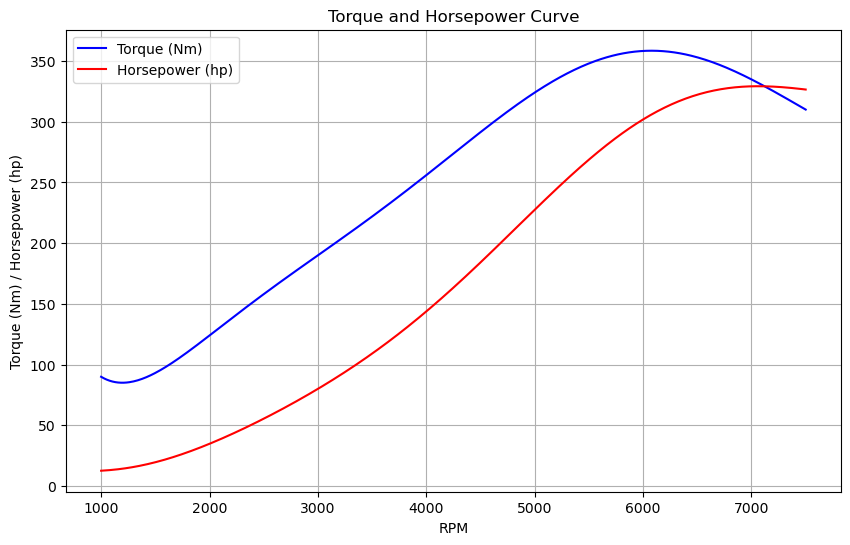

RPM = 1000, Torque = 90.00 Nm, Horsepower = 12.64 hp
RPM = 2000, Torque = 124.00 Nm, Horsepower = 34.83 hp
RPM = 3500, Torque = 221.93 Nm, Horsepower = 109.08 hp
RPM = 5000, Torque = 324.00 Nm, Horsepower = 227.50 hp
RPM = 6200, Torque = 357.99 Nm, Horsepower = 311.69 hp
RPM = 6500, Torque = 353.01 Nm, Horsepower = 322.23 hp
RPM = 7000, Torque = 334.83 Nm, Horsepower = 329.15 hp
RPM = 7500, Torque = 310.00 Nm, Horsepower = 326.50 hp


In [60]:
import numpy as np
import matplotlib.pyplot as plt

def plot_poly_with_hp(coeff_dict, x_start, x_end, num_points=500):
    coeffs = [coeff_dict[f"coefficient_{i}"] for i in range(len(coeff_dict))]
    coeffs = coeffs[::-1]  # reverse order

    rpm = np.linspace(x_start, x_end, num_points)
    torque = np.polyval(coeffs, rpm)  # torque in Nm

    # Calculate horsepower
    power_watts = torque * (2 * np.pi * rpm) / 60
    horsepower = power_watts / 745.7

    plt.figure(figsize=(10,6))
    plt.plot(rpm, torque, label='Torque (Nm)', color='blue')
    plt.plot(rpm, horsepower, label='Horsepower (hp)', color='red')
    plt.xlabel('RPM')
    plt.ylabel('Torque (Nm) / Horsepower (hp)')
    plt.title('Torque and Horsepower Curve')
    plt.grid(True)
    plt.legend()
    plt.show()

    return coeffs

def evaluate_and_print(coeffs, x_values):
    y_values = np.polyval(coeffs, x_values)
    for xv, yv in zip(x_values, y_values):
        power_w = yv * (2 * np.pi * xv) / 60
        hp = power_w / 745.7
        print(f"RPM = {xv:.0f}, Torque = {yv:.2f} Nm, Horsepower = {hp:.2f} hp")

coefficients_dict = {
  "coefficient_0": 474.75413594574826,
"coefficient_1": -0.9356429491796222,
"coefficient_2": 0.0008384783264329184,
"coefficient_3": -3.6568593666614717e-07,
"coefficient_4": 8.95405136398753e-11,
"coefficient_5": -1.229693304143362e-14,
"coefficient_6": 8.781921576055607e-19,
"coefficient_7": -2.5349288968078166e-23,
}

coeffs = plot_poly_with_hp(coefficients_dict, 1000, 7500)

x_points = [1000, 2000, 3500, 5000, 6200, 6500, 7000, 7500]
evaluate_and_print(coeffs, x_points)
